In [2]:
import math
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt



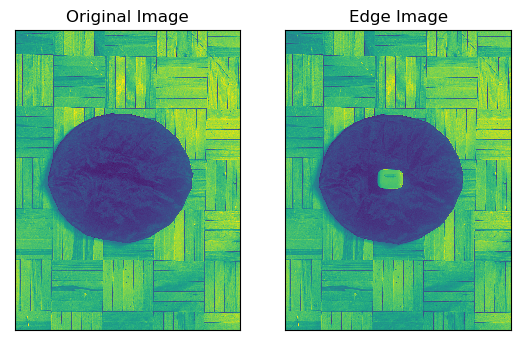

In [3]:
# Load the images
background_img = cv2.imread('back_Airpods.jpg', cv2.IMREAD_GRAYSCALE)
object_img = cv2.imread('Airpods_back.jpg', 0)  # Assuming grayscale

plt.subplot(121),plt.imshow(background_img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(object_img)
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
# Step 1: Perform edge detection


img = cv2.medianBlur(background_img, 5)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20,
                               param1=50, param2=30, minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
        cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)
   








#for image 
gray_image = cv2.cvtColor(object_img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Perform Canny edge detection
edges = cv2.Canny(blurred_image, 12, 20)  # You can adjust these thresholds as needed



kernel = np.ones((5, 5), np.uint8)
edges = cv2.dilate(edges, kernel, iterations=10)
edges = cv2.erode(edges, kernel, iterations=1)
# edges = cv2.dilate(edges, kernel, iterations=3)

#Find contours
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)




# Draw contours on the original image
cv2.drawContours(object_img, contours, -1, (0, 255, 0), 10)  # You can adjust thickness and color as needed









plt.subplot(121),plt.imshow(cimg)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(object_img)
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()


In [6]:
# Step 2: Extract keypoints and descriptors using SIFT
sift = cv2.SIFT_create()

# Find keypoints and descriptors for background image
kp1, des1 = sift.detectAndCompute(edges_background, None)

# Find keypoints and descriptors for object image
kp2, des2 = sift.detectAndCompute(edges_object, None)

# Step 3: Match keypoints
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)



Text(0.5, 1.0, 'contours')

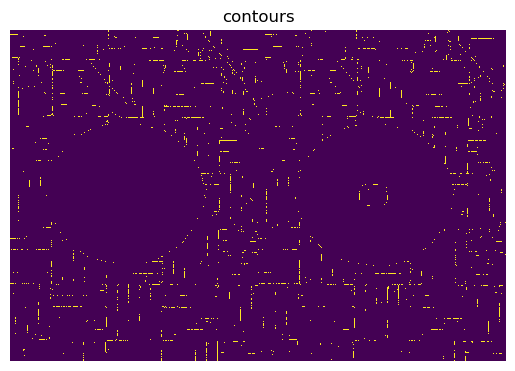

In [7]:
# Create an empty mask for the merged image
merged_img = np.zeros((max(background_img.shape[0], object_img.shape[0]), background_img.shape[1] + object_img.shape[1]), dtype=np.uint8)

# Overlay edges from the background image
merged_img[:background_img.shape[0], :background_img.shape[1]] = edges_background

# Overlay edges from the object image
merged_img[:object_img.shape[0], background_img.shape[1]:] = edges_object

# Display the merged image with matched keypoints
plt.imshow(merged_img)
plt.axis('off')
plt.title("contours")